In [84]:
#Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Save each csv file to a variable
meta_path = "Data/Mouse_metadata.csv"
study_path = "Data/Study_results.csv"

# Read in the csv files
mouse_metadata = pd.read_csv(meta_path)
study_results = pd.read_csv(study_path)

# Merge the data
merge_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
merge_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [85]:
# Checking the number of mice using nunique

mice_count = merge_df['Mouse ID'].nunique()

mice_count

249

In [86]:
# Get the duplicated mice by ID number that shows up for Mouse ID and Timepoint

merge_duplicates = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
merge_duplicates_df = pd.DataFrame(merge_duplicates)
#print the stored variable merge_dup to determine the duplicate ID. 
merge_duplicates_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [87]:
#store and locate the data for the duplicate Mouse ID G989
merge_dup = merge_df.loc[merge_df["Mouse ID"]=='g989']
merge_dup_df = pd.DataFrame(merge_dup)

merge_dup_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# clean_merge_df= merge_df[merge_df["Mouse ID"].isin(["g989"])==False]
# clean_merge_df

clean_merge = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_merge_df = pd.DataFrame(clean_merge_df)
clean_merge_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1883 rows x 8 columns]

In [89]:
# Checking the number of mice in the clean DataFrame.

mice_count_clean= len(clean_merge_df)
mice_count_clean

1883

## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

avg_tumor_volume=clean_merge_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
med_tumor_volume= clean_merge_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_tumor_volume=clean_merge_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
SD_tumor_volume=clean_merge_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM_tumor_volume=clean_merge_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_df = pd.DataFrame({
    
    "Mean Tumor Volume" : avg_tumor_volume, 
    "Median Tumor Volume" : med_tumor_volume,
    "Tumor Volume Variance" : var_tumor_volume,
    "Tumor Volume Std. Dev." : SD_tumor_volume,
    "Tumor Volume Std. Err." : SEM_tumor_volume 
    
})
    
summary_df    


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.458254            50.854632              44.053659   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.637293                0.540135  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.



clean_merge_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]
    
})

# ({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

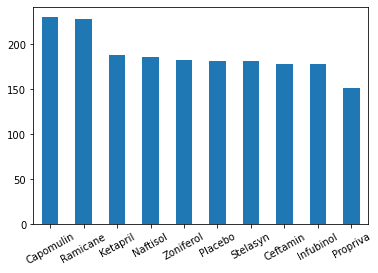

In [117]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_count = clean_merge_df['Drug Regimen'].value_counts()

drug_count.plot(kind='bar')

plt.xticks(rotation=29)

#plt.xlabel("")

plt.show()


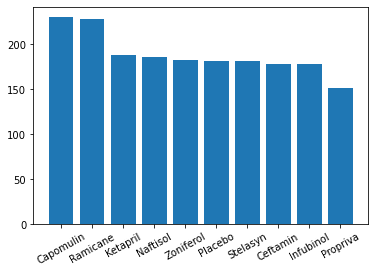

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_count.index.values, drug_count.values)

plt.xticks(rotation=29)

plt.show()

# Generate a pie plot showing the distribution of female versus male mice using Pandas


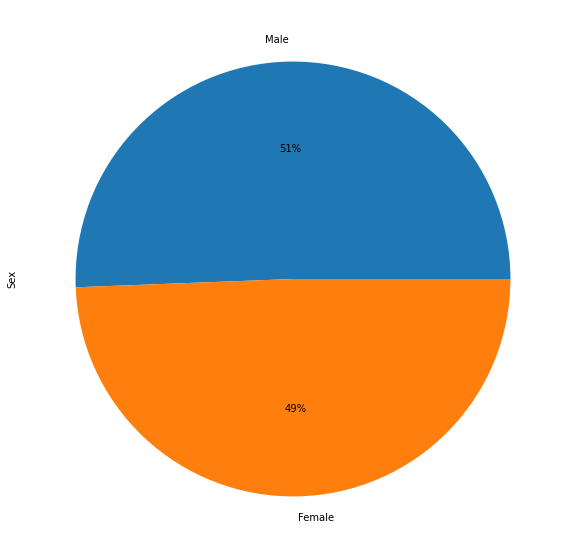

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = merge_df["Sex"].value_counts().head(20)

plot = sex.plot.pie(y='Sex', autopct='%1.0f%%', figsize=(10, 10))

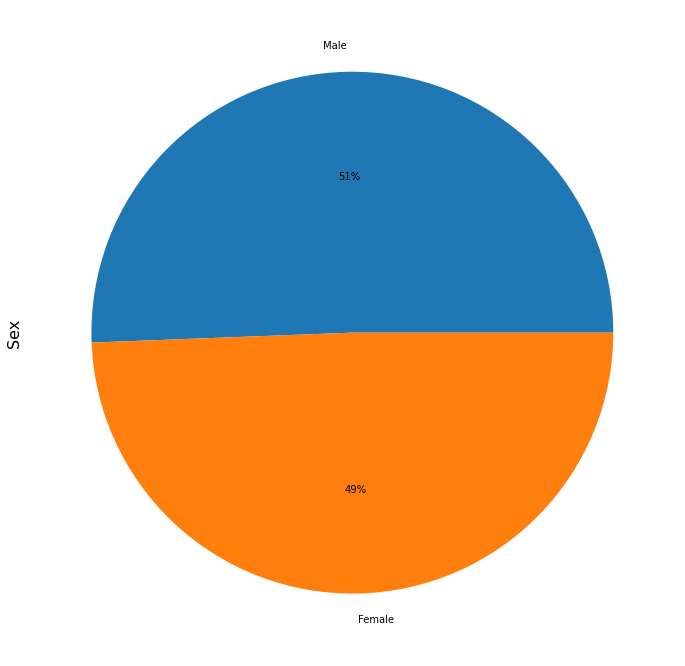

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = merge_df["Sex"].value_counts().head(20)

# plot the pie chart
plt.pie(sex, labels=sex.index, autopct='%1.0f%%')
plt.ylabel('Sex', fontsize=16)

# adjust the size of the chart
plt.gcf().set_size_inches(12,12)

# adjust the font size of the labels
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontsize(18)

# show the plot
plt.show()

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_last = clean_merge.groupby('Mouse ID').max()["Timepoint"]



four_drug_df = pd.merge(timepoint_last, clean_merge, on=("Mouse ID", "Timepoint"),how ="left")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_last_timepoint = four_drug_df[four_drug_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
tumor_last_timepoint

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
239     y769         45     Ceftamin  Female           6          27   
240     y793         45    Capomulin    Male          17          17   
241     y865         45     Ceftamin    Male          23          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
3             62.999356                 3  
6             38.407618                 1  
7             43.047543                 0  
..                  ...               ...  
239           68.594745                 4  
240           31.896238                 2  
241           64.729837                 3  
245           30.638696                 0  
246           62.754451                 3  

[100 rows x 8 columns]

In [122]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_empty = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# q3, q1 = np.percentile(four_drug_df['Tumor Volume (mm3)'], [75 ,25])
# iqr = q3 - q1

#display interquartile range 
# iqr

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    print(f"{treatment}:")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = four_drug_df.loc[four_drug_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_empty.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Outliers:")
    if not outliers.empty:
        print(outliers)
    else:
        print("None")




Capomulin:
Outliers:
None
Ramicane:
Outliers:
None
Infubinol:
Outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:
Outliers:
None


# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


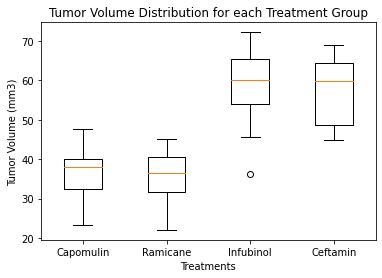

In [123]:
## Line and Scatter Plots

#create a variable to store the tumor volume data

tumor_vol = tumor_vol_empty

#create plot

fig1,ax1 = plt.subplots()

#create plot labels and display the plot

ax1.set_title('Tumor Volume Distribution for each Treatment Group')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Treatments')
ax1.boxplot(tumor_vol, labels=treatments)
plt.show()


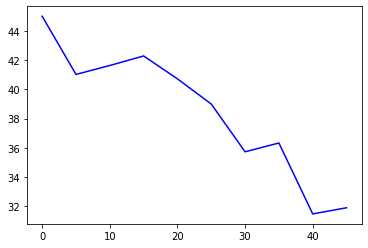

In [159]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


cap_data = clean_merge_df.loc[(clean_merge_df['Drug Regimen'] == 'Capomulin') & (clean_merge_df['Mouse ID'] == 'y793')]
                             
x = cap_data['Timepoint']
y = cap_data['Tumor Volume (mm3)']
# plt.plot(x,y,color = "g", marker = "o", linestyle= "--", linewidth = 3,
#         markersize = 10)
world_avg, = plt.plot(x, y, color="blue", label="Timepoint vs Tumor Volume (mm3)" )

# figure1 = four_drug_df.plot(kind="plot", facecolor="red", figsize=(8,6),
#                                 title="Tumor Volume(mm3) vs Timepoint",
#                                 xlabel="Timepoint",
#                                 ylabel="Tumor Volume (mm3)")

# # Configure x-tick rotation
# xticklabels = union_data.index
# figure1.set_xticklabels(xticklabels)

# # Show plot
plt.show()

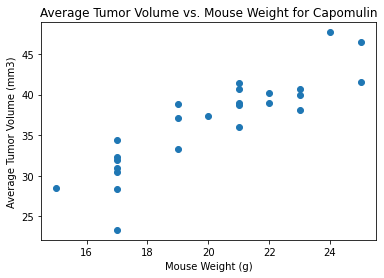

In [160]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Parse the data for the Capomulin regimen
capomulin_data = four_drug_df.loc[four_drug_df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the mean tumor volume for each mouse
capomulin_group = capomulin_data.groupby(['Mouse ID']).mean()

# Create the scatter plot
plt.scatter(capomulin_group['Weight (g)'], capomulin_group['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.show()

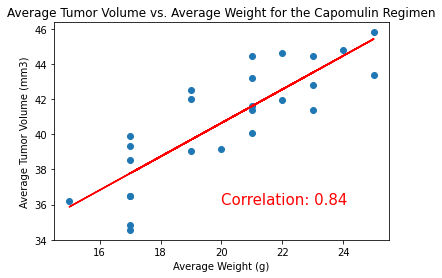

In [170]:
#Locate the data for Capomulin
cap_df = clean_merge_df.loc[clean_merge_df["Drug Regimen"] == "Capomulin"]

#grouping the dataframe by mouse ID
group_df = cap_df.groupby(["Mouse ID"])

#calculating the mean weight of mice
avg_lbs = group_df["Weight (g)"].mean()

#calculating the average tumor volume
tumor_volume = group_df["Tumor Volume (mm3)"].mean()

# creating a scatter plot of average tumor volume vs mouse weight
plt.scatter(avg_lbs, tumor_volume)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Average Weight for the Capomulin Regimen")

#calculating the correlation coefficient
correlation = round(st.pearsonr(avg_lbs, tumor_volume)[0],2)

#performing linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_lbs, tumor_volume)

#calculating the regression values
regress_values = avg_lbs * slope + intercept

#plotting the regression line
plt.plot(avg_lbs,regress_values,"r-")

#annotating the correlation coefficient on the plot
plt.annotate(f'Correlation: {correlation}',(20,36),fontsize=15,color="red")

#displaying the plot
plt.show()